<a href="https://colab.research.google.com/github/Babs-Coding/Refonte/blob/main/Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 59ms/step - accuracy: 0.8915 - loss: 0.3673 - val_accuracy: 0.9834 - val_loss: 0.0491
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.9856 - loss: 0.0476 - val_accuracy: 0.9880 - val_loss: 0.0375
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9903 - loss: 0.0309 - val_accuracy: 0.9898 - val_loss: 0.0302
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 59ms/step - accuracy: 0.9929 - loss: 0.0207 - val_accuracy: 0.9912 - val_loss: 0.0282
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.9955 - loss: 0.0139 - val_accuracy: 0.9905 - val_loss: 0.0288
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9962 - loss: 0.0118 - val_accuracy: 0.9902 - val_loss: 0.0341
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.9895 - val_loss: 0.0359
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.9972 - loss: 0.0079 - 

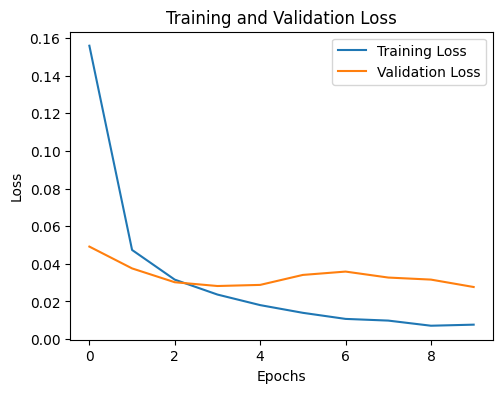

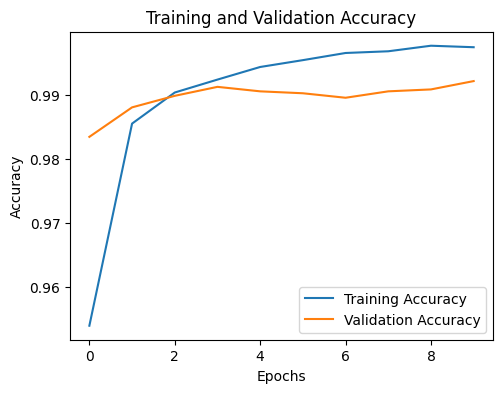

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9898 - loss: 0.0365
Test Accuracy: 99.21%
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


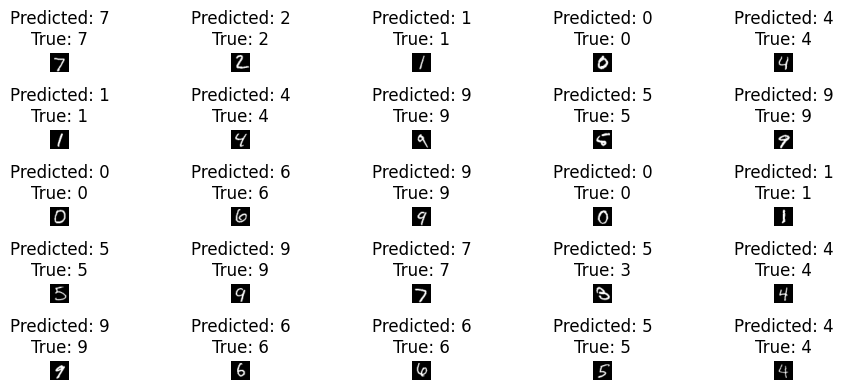

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = models.Sequential([layers.Input(
    shape=(28, 28, 1)), layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(), layers.Dense(128, activation="relu"), layers.Dense(activation="softmax", units=10)])

#complier and training model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

trainer = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1, validation_data=(x_test, y_test))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(trainer.history["loss"], label="Training Loss")
plt.plot(trainer.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(trainer.history["accuracy"], label="Training Accuracy")
plt.plot(trainer.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

predictions = model.predict(x_test)

plt.figure(figsize=(10, 4))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
  predicted_label = np.argmax(predictions[i])
  true_label = np.argmax(y_test[i])
  plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
  plt.axis("off")
plt.tight_layout()
plt.show()


